In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions, and settings.
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
#read data
adata_neg , adata_pos = read_chlamydomonas_files(n_obs=3000)



silhoutte score before : 0.08819773
davies_bouldin_score: 3.1180831844415464
calinski_harabasz_score: 600.8027345269905


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical


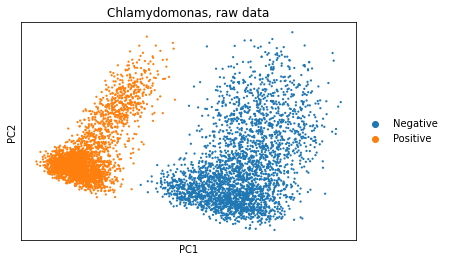

In [2]:
#standard pre-processing
sc.pp.filter_cells(adata_neg, min_genes=100)
sc.pp.filter_cells(adata_pos, min_genes=100)
sc.pp.normalize_per_cell(adata_neg, counts_per_cell_after=1e4)
sc.pp.log1p(adata_neg)
sc.pp.normalize_per_cell(adata_pos, counts_per_cell_after=1e4)
sc.pp.log1p(adata_pos)

adata_unit = adata_neg.concatenate(adata_pos)
bdata_unit = copy.deepcopy(adata_unit.copy())
filter_result = sc.pp.filter_genes_dispersion(
        bdata_unit.X,  n_top_genes=7000, log=False
    )
adata_unit._inplace_subset_var(filter_result.gene_subset)
adata_neg._inplace_subset_var(filter_result.gene_subset)  # filter genes
adata_pos._inplace_subset_var(filter_result.gene_subset)  # filter genes
bdata_unit._inplace_subset_var(filter_result.gene_subset)
#plot_diurnal_cycle_by_phase(bdata_unit, title="Merged , raw data")
labels = adata_unit.obs["FE"]
print("silhoutte score before : " +str(silhouette_score(adata_unit.X,labels)))
print("davies_bouldin_score: "+str(davies_bouldin_score(adata_unit.X,labels)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(adata_unit.X,labels)))
sc.tl.pca(bdata_unit)
sc.pl.pca(bdata_unit,color="FE", title="Chlamydomonas, raw data")


In [3]:
#Signal reconstruction - standard parameters
E_pos , E_rec_pos = reconstruction_cyclic(adata_pos.X, iterNum=75,batch_size=5000 ) # 25,4000,0.1
E_neg , E_rec_neg = reconstruction_cyclic(adata_neg.X, iterNum=75,batch_size=5000 ) # 25,4000,0.1
order_list_pos = E_to_range(E_rec_pos)
adata_pos = adata_pos[order_list_pos,:]
order_list_neg = E_to_range(E_rec_neg)
adata_neg = adata_neg[order_list_neg,:]
adata_neg.write(filename="adata_neg_reordered.h5ad")
adata_pos.write(filename="adata_pos_reordered.h5ad")


Iteration number: 0 function value= 8.838315944417082e-21
Iteration number: 25 function value= 15748.900119983464
Iteration number: 50 function value= 15610.029878774109
Iteration number: 0 function value= 9.802325412981918e-21
Iteration number: 25 function value= 37494.806325485755
Iteration number: 50 function value= 36614.42278117034


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'FE' as categorical
/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/Users/jonathank

In [4]:
bdata_pos = copy.deepcopy(adata_pos.copy())
bdata_neg = copy.deepcopy(adata_neg.copy())

cdata_pos = copy.deepcopy(adata_pos.copy())
cdata_neg = copy.deepcopy(adata_neg.copy())

#plot_diurnal_cycle_by_phase(adata_pos, title="Ordered , FE+ ")
#plot_diurnal_cycle_by_phase(adata_neg, title="Ordered , FE- ")


Iteration number: 1 function value: 33918.432627376256
Iteration number: 26 function value: 177592.3068093027
Iteration number: 51 function value: 180528.22461086867
Iteration number: 76 function value: 181452.1933139365


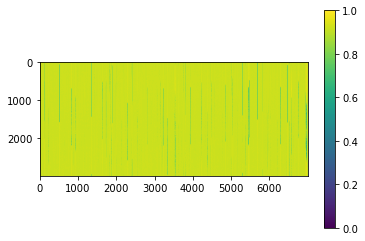

Iteration number: 1 function value: 10841.88085516316
Iteration number: 26 function value: 135612.4316995365
Iteration number: 51 function value: 139146.46661584527
Iteration number: 76 function value: 140144.75614831602


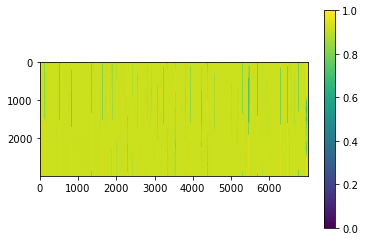

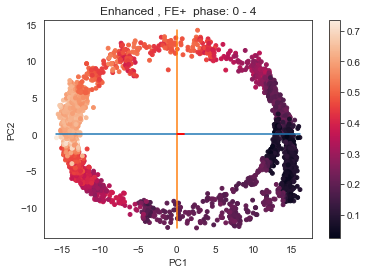

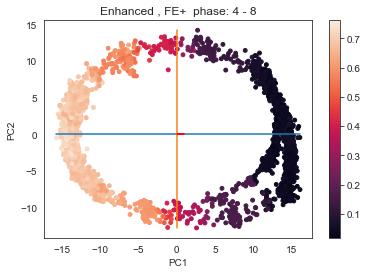

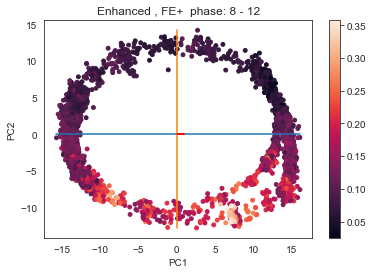

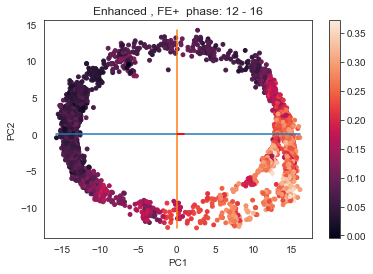

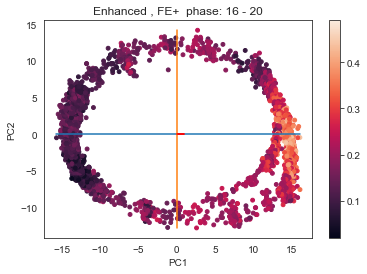

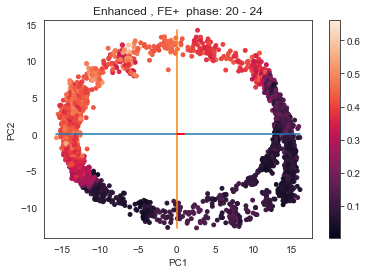

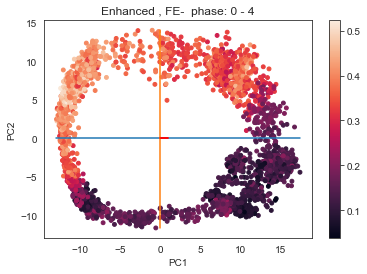

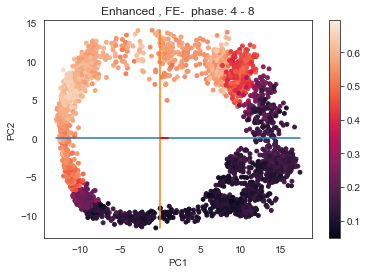

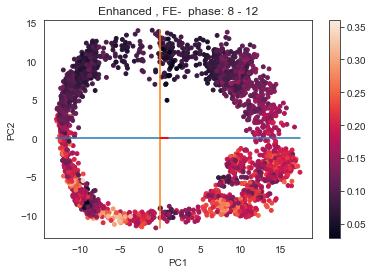

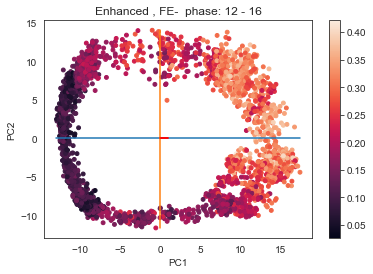

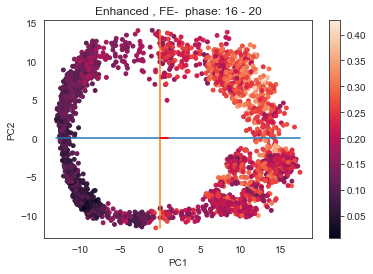

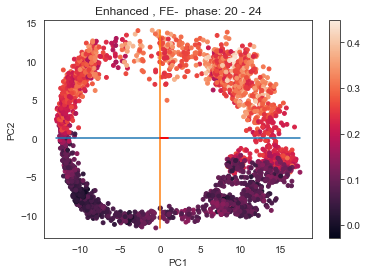

In [7]:
#Signal Enhancement

F_en_neg =enhancement_cyclic(bdata_neg.X, regu=0.01 ,iterNum=100)
F_en_pos =enhancement_cyclic(bdata_pos.X, regu=0.01 ,iterNum=100)
bdata_neg.X = bdata_neg.X * F_en_neg
bdata_pos.X = bdata_pos.X * F_en_pos

plot_diurnal_cycle_by_phase(bdata_pos, title="Enhanced , FE+ ")
plot_diurnal_cycle_by_phase(bdata_neg, title="Enhanced , FE- ")


starting filtering
25th Iteration    Loss :: 1823.1566134026625 gradient :: 32.38097359198708
50th Iteration    Loss :: 850.836686186447 gradient :: 41.855416449975
75th Iteration    Loss :: 558.0148637534323 gradient :: 9.514949630566656
100th Iteration    Loss :: 421.9924377704599 gradient :: 7.144132330868041
125th Iteration    Loss :: 354.64221238319396 gradient :: 5.980974280009766
150th Iteration    Loss :: 296.96331265372 gradient :: 5.008958960907561
175th Iteration    Loss :: 259.3203320384803 gradient :: 4.369811593356982
200th Iteration    Loss :: 231.14124702308348 gradient :: 5.319890697489281
225th Iteration    Loss :: 208.20070164477443 gradient :: 3.5042568692293816
250th Iteration    Loss :: 190.59526914682112 gradient :: 3.2001368003462995
275th Iteration    Loss :: 171.93313867530983 gradient :: 4.623322778868856
300th Iteration    Loss :: 159.94891431655557 gradient :: 2.666845688832076
starting filtering
25th Iteration    Loss :: 699.5035787376044 gradient :: 40.88

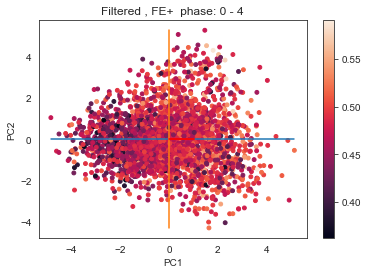

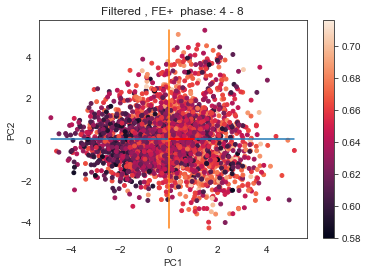

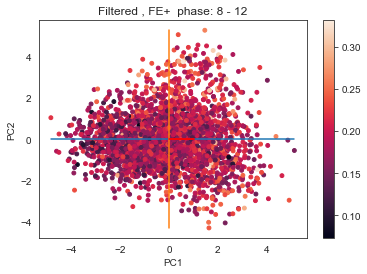

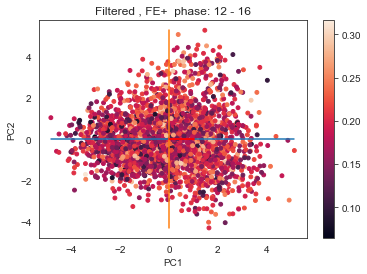

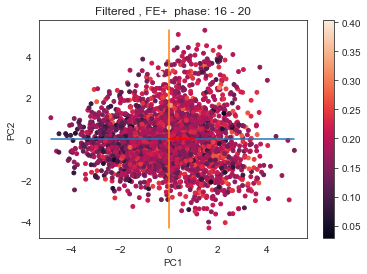

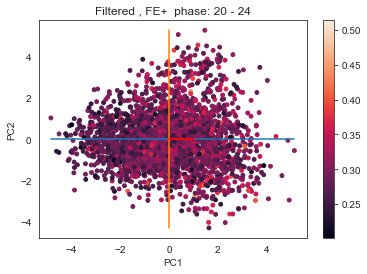

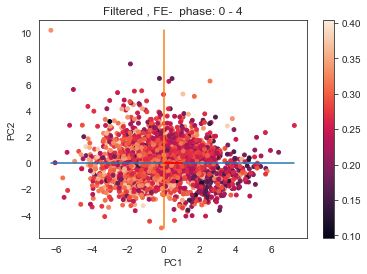

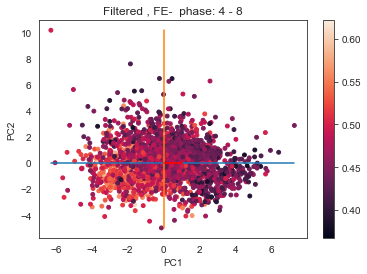

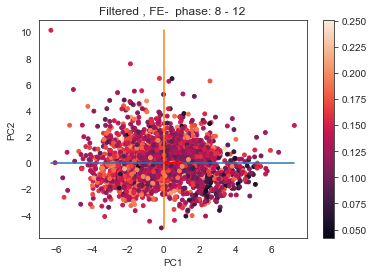

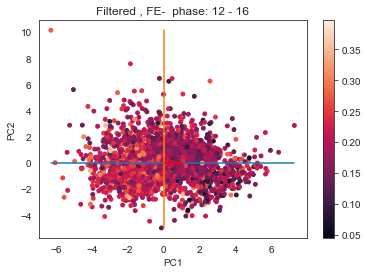

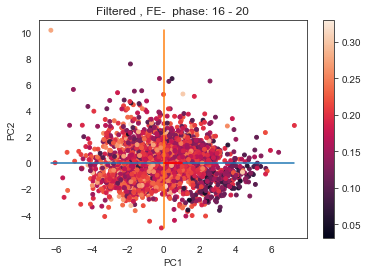

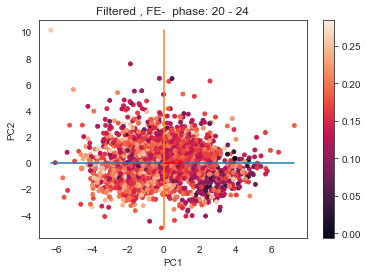

In [8]:
#Signal filtering

F_neg =filtering_cyclic(adata_neg.X, regu=0 ,iterNum=300)
F_pos =filtering_cyclic(adata_pos.X, regu=0 ,iterNum=300)

cdata_neg.X = cdata_neg.X * F_neg
cdata_pos.X = cdata_pos.X * F_pos

plot_diurnal_cycle_by_phase(cdata_pos, title="Filtered , FE+ ")
plot_diurnal_cycle_by_phase(cdata_neg, title="Filtered , FE- ")


silhoutte score  : 0.13608755
davies_bouldin_score: 2.422361102629269
calinski_harabasz_score: 1000.4458248966405


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical


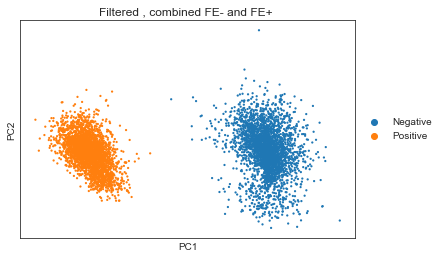

In [14]:
cdata_unit = cdata_neg.concatenate(cdata_pos)
labels_str = cdata_unit.obs["FE"]
print("silhoutte score  : " +str(silhouette_score(cdata_unit.X,labels_str)))
print("davies_bouldin_score: "+str(davies_bouldin_score(cdata_unit.X,labels_str)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(cdata_unit.X,labels_str)))
sc.tl.pca(cdata_unit)
sc.pl.pca(cdata_unit,color="FE" , title="Filtered , combined FE- and FE+ ")


silhoutte score  : 0.026187887
davies_bouldin_score: 6.71236071764892
calinski_harabasz_score: 131.26279062043355


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'FE' as categorical


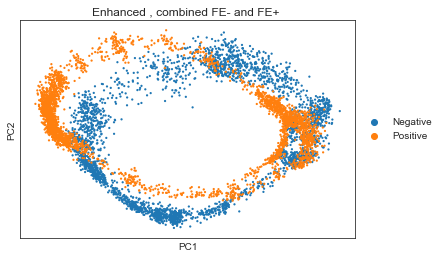

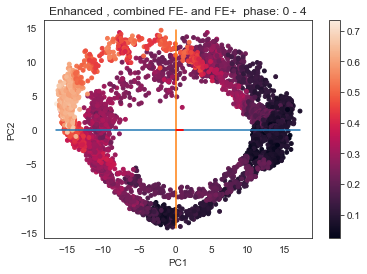

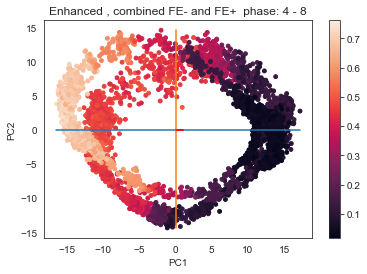

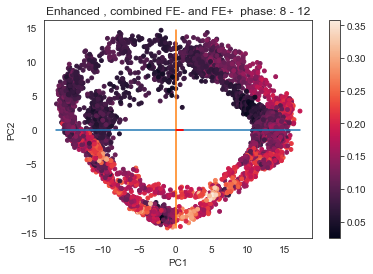

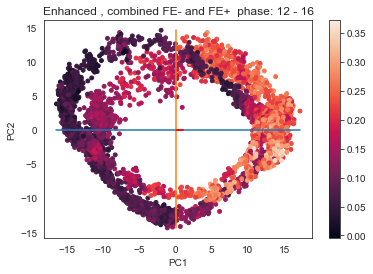

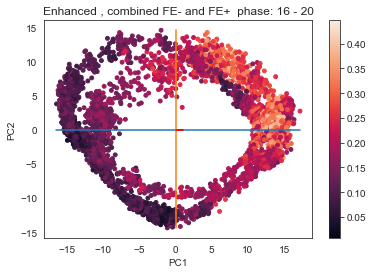

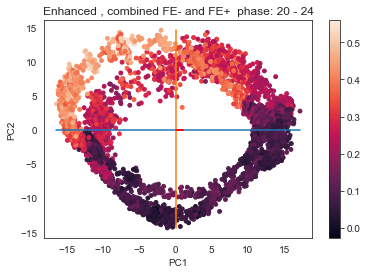

In [15]:
bdata_unit = bdata_neg.concatenate(bdata_pos)
labels_str = bdata_unit.obs["FE"]
print("silhoutte score  : " +str(silhouette_score(bdata_unit.X,labels_str)))
print("davies_bouldin_score: "+str(davies_bouldin_score(bdata_unit.X,labels_str)))
print("calinski_harabasz_score: "+str(calinski_harabasz_score(bdata_unit.X,labels_str)))
sc.tl.pca(bdata_unit)
sc.pl.pca(bdata_unit,color="FE" , title="Enhanced , combined FE- and FE+ ")
plot_diurnal_cycle_by_phase(bdata_unit, title="Enhanced , combined FE- and FE+ ")
